In [1]:
import sys
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LATITUDE_FORMATTER, LONGITUDE_FORMATTER
import matplotlib.ticker as mticker
import matplotlib.colors as mcolors
import matplotlib.colorbar as mcb
import cartopy.feature as cfeature
from matplotlib import gridspec
from datetime import datetime
import warnings
from osgeo import gdal
import numpy as np
from osgeo import gdal, ogr, osr
import sys
import pandas as pd
import matplotlib
import geopandas as gpd
from matplotlib import gridspec
from cartopy.io import shapereader
import shapely.geometry as sgeom
import numpy as np
import matplotlib as mpl
import urllib
import numpy
import numpy as np
import numpy.ma as ma
from lxml import etree
from datetime import datetime, timedelta
import matplotlib
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors
sys.path.insert(0, r'D:\GitHub\pynotebook\ipymodules\GDMA')
import gdma

In [2]:
endpoint='http://192.168.1.104:8080/rasdaman/ows'
field={}
field['SERVICE']='WCS'
field['VERSION']='2.0.1'
field['REQUEST']='DescribeCoverage'
field['COVERAGEID']='NDVI_MOD13C1005_uptodate'#'NDVI_MOD13C1005'#'trmm_3b42_coverage_1'
url_values = urllib.urlencode(field,doseq=True)
full_url = endpoint + '?' + url_values
data = urllib.urlopen(full_url).read()
root = etree.fromstring(data)
lc = root.find(".//{http://www.opengis.net/gml/3.2}lowerCorner").text
uc = root.find(".//{http://www.opengis.net/gml/3.2}upperCorner").text
start_date=int((lc.split(' '))[2])
end_date=int((uc.split(' '))[2])
#print [start_date, end_date]

#generate the dates list 
start=datetime.fromtimestamp((start_date-(datetime(1970,1,1)-datetime(1601,1,1)).days)*24*60*60)
#print start

In [3]:
try:    
    # get sample size coefficients from XML root
    sample_size = root[0][3][0][5][0][1].text #sample size
    #print root[0][3][0][5][0][1].text #sample size

    # use coverage start_date and sample_size array to create all dates in ANSI
    array_stepsize = np.fromstring(sample_size, dtype=int, sep=' ')
    #print np.fromstring(sample_size, dtype=int, sep=' ')
    array_all_ansi = array_stepsize + start_date  
    print 'irregular'
    print array_all_ansi
except IndexError:
    datelist, cur_pos = datelist_regular_coverage(root, start_date, start, cur_date)
    print 'regular'

# create array of all dates in ISO
list_all_dates = []
for stepsize in array_stepsize:
    date_and_stepsize = start + timedelta(stepsize - 1)
    list_all_dates.append(date_and_stepsize)
    #print date_and_stepsize
array_all_dates = np.array(list_all_dates)   

# create array of all dates in string
array_all_date_string = []
for i in array_all_dates:
    date_string = str(i.year).zfill(2)+'-'+str(i.month).zfill(2)+'-'+str(i.day).zfill(2)
    array_all_date_string.append(date_string)
array_all_date_string    

irregular
[145780 145796 145812 145828 145844 145860 145876 145892 145908 145924
 145940 145956 145972 145988 146004 146020 146036 146052 146068 146084
 146114 146130 146146 146162 146178 146194 146210 146226 146242 146258
 146274 146290 146306 146322 146338 146354 146370 146386 146402 146418
 146479 146495 146511 146527 146543 146559 146575 146591 146607 146623
 146639 146655 146671 146687 146703 146719 146735 146751 146767 146783
 146799 146815 146844 146860 146892 146908 146924 146940 146956 146972
 146988 147004 147020 147036 147052 147068 147084 147100 147116 147132
 147148 147164 147180 147209 147225 147241 147257 147273 147289 147305
 147321 147337 147353 147369 147385 147401 147417 147433 147449 147465
 147481 147497 147529 147545 147575 147591 147607 147623 147639 147655
 147671 147687 147703 147719 147735 147751 147767 147783 147799 147815
 147831 147847 147863 147879 147895 147911 147940 147956 147972 147988
 148004 148020 148036 148052 148068 148084 148100 148116 148132 148

['2000-02-18',
 '2000-03-05',
 '2000-03-21',
 '2000-04-06',
 '2000-04-22',
 '2000-05-08',
 '2000-05-24',
 '2000-06-09',
 '2000-06-25',
 '2000-07-11',
 '2000-07-27',
 '2000-08-12',
 '2000-08-28',
 '2000-09-13',
 '2000-09-29',
 '2000-10-15',
 '2000-10-31',
 '2000-11-16',
 '2000-12-02',
 '2000-12-18',
 '2001-01-17',
 '2001-02-02',
 '2001-02-18',
 '2001-03-06',
 '2001-03-22',
 '2001-04-07',
 '2001-04-23',
 '2001-05-09',
 '2001-05-25',
 '2001-06-10',
 '2001-06-26',
 '2001-07-12',
 '2001-07-28',
 '2001-08-13',
 '2001-08-29',
 '2001-09-14',
 '2001-09-30',
 '2001-10-16',
 '2001-11-01',
 '2001-11-17',
 '2002-01-17',
 '2002-02-02',
 '2002-02-18',
 '2002-03-06',
 '2002-03-22',
 '2002-04-07',
 '2002-04-23',
 '2002-05-09',
 '2002-05-25',
 '2002-06-10',
 '2002-06-26',
 '2002-07-12',
 '2002-07-28',
 '2002-08-13',
 '2002-08-29',
 '2002-09-14',
 '2002-09-30',
 '2002-10-16',
 '2002-11-01',
 '2002-11-17',
 '2002-12-03',
 '2002-12-19',
 '2003-01-17',
 '2003-02-02',
 '2003-03-06',
 '2003-03-22',
 '2003-04-

In [4]:
start_date = 146639
start = datetime.fromtimestamp((start_date-(datetime(1970,1,1)-datetime(1601,1,1)).days)*24*60*60)
print start

2002-06-27 08:00:00


In [5]:
x = np.asarray(array_all_date_string)
start = np.where(x == '2009-05-25')[0][0]
end = start + 1
#for date in range(start,end):    
for date in array_all_date_string[start:end]:

    #spl_arr = [70,30,80,50] minlon,maxlon, minlat, maxlat
    #extent = [73.5,140,14,53.6]
    #extent = [-179, 179, -60, 90]
    extent = [142.1, 163, -58.4, -38.3]
    spl_arr = [extent[0], extent[2], extent[1], extent[3]]
    ndai_wcs= gdma._NDAI_CAL(date, spl_arr)
    #ndai_wcs = 'NDAI20090525.tif'
    array = gdal.Open(ndai_wcs).ReadAsArray()
    #band = raster.GetRasterBand(1)
    #array = band.ReadAsArray()
    #band.GetNoDataValue()

    array_msk = np.ma.masked_equal(array,array.min())
    #plt.imshow(array_msk)    

    vector_path = r'D:\Data\WorldShapefile//tasmania_simplified.shp'
    raster_path = ndai_wcs
    nodata_value = array.min()
    print 'nodata value NDAI: ', nodata_value
    # get date in format DOY+YEAR: eg. 0652011
    # NDAI_2014_008.tif

    year = int(ndai_wcs[-12:-8])
    month = int(ndai_wcs[-8:-6])
    day = int(ndai_wcs[-6:-4])
    date = datetime(year,month,day)
    try: 
        date_str = str(date.year)+str(date.month).zfill(2)+str(date.day).zfill(2)
        print date_str
    except:        
        print date, ' aaahh'    

    stats = gdma.zonal_stats(vector_path, raster_path, nodata_value, date)   

    df_stats = pd.DataFrame(stats)
    #df_stats.set_index('FID', inplace=True)
    #print df_stats.head(2)

    # read shapefile and concatate on index using a 'inner' join
    # meaning counties without statistics info will be ignored
    gdf = gpd.read_file(vector_path)
    gdf.index.rename('FID', inplace=True)
    gdf.reset_index(inplace=True)
    frames  = [df_stats,gdf]
    gdf_df_stats = gdf.merge(df_stats, on='FID')
    gdf_df_stats.set_index('FID', inplace=True)

    # get column names
    ax1_head = gdf_df_stats.columns[10] # P00082014
    ax2_head = gdf_df_stats.columns[11] # P10082014
    ax3_head = gdf_df_stats.columns[12] # P20082014
    ax4_head = gdf_df_stats.columns[13] # P30082014
    ax5_head = gdf_df_stats.columns[8]  # MEAN
    ax6_head = gdf_df_stats.columns[6]  # DC0082014
    print ax1_head, ax2_head, ax3_head, ax4_head, ax5_head, ax6_head
    columns_shp = [ax1_head, ax2_head, ax3_head, ax4_head, ax5_head, ax6_head]
    # drop NaN values for axis
    gdf_df_stats.dropna(inplace=True, subset=columns_shp)
    #gdf_df_stats.head(50)
    #gdf_df_stats = gpd.pd.concat(frames, axis=1, join='inner')
    #gdf_df_stats.index.rename('FID', inplace=True)
    #gdf_df_stats.geometry = gdf_df_stats.geometry.astype(gpd.geoseries.GeoSeries) # overcome bug 
    #gdf_df_stats.head(2) 

    # if necessary save to shapefile
    out_filename = r'D:\GitHub\pynotebook\ipymodules\GDMA//world_NDAI'+date_str+'.shp'
    gdf_df_stats.to_file(out_filename)  

    china_adm3 = out_filename
    china_adm3_shp = shapereader.Reader(china_adm3)
    # rasterize the data
    gdma.rasterize(date_str = date_str, in_shp = out_filename)
    gdma.plot_map(date_str = date_str, date=date, extent = extent)

NDAI start
calculate NTAI
[146242 146607 146972 147337 147703 148068 148433 148798 149164 149529
 149894 150259 150625 150990 151355]
8
irregular
LST:  2001-05-26 08:00:00
LST:  2002-05-26 08:00:00
LST:  2003-05-26 08:00:00
LST:  2004-05-25 08:00:00
LST:  2005-05-26 08:00:00
LST:  2006-05-26 08:00:00
LST:  2007-05-26 08:00:00
LST:  2008-05-25 08:00:00
LST:  2009-05-26 08:00:00
LST:  2010-05-26 08:00:00
LST:  2011-05-26 08:00:00
LST:  2012-05-25 08:00:00
LST:  2013-05-26 08:00:00
LST:  2014-05-26 08:00:00
LST:  2015-05-26 08:00:00
calculate NVAI
[145876 146242 146607 146972 147337 147703 148068 148433 148798 149164
 149529 149894 150259 150625 150990 151355]
9
irregular
NDVI:  2000-05-25 08:00:00
NDVI:  2001-05-26 08:00:00
NDVI:  2002-05-26 08:00:00
NDVI:  2003-05-26 08:00:00
NDVI:  2004-05-25 08:00:00
NDVI:  2005-05-26 08:00:00
NDVI:  2006-05-26 08:00:00
NDVI:  2007-05-26 08:00:00
NDVI:  2008-05-25 08:00:00
NDVI:  2009-05-26 08:00:00
NDVI:  2010-05-26 08:00:00
NDVI:  2011-05-26 08:00:0

D:\Python27x64\lib\site-packages\matplotlib\artist.py:221: MatplotlibDeprecationWarning: This has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  warnings.warn(_get_axes_msg, mplDeprecation, stacklevel=1)


In [6]:
ndai_wcs = 'NDAI20090525.tif'
array = gdal.Open(ndai_wcs).ReadAsArray()
#band = raster.GetRasterBand(1)
#array = band.ReadAsArray()
#band.GetNoDataValue()

array_msk = np.ma.masked_equal(array,array.min())
#plt.imshow(array_msk)    

vector_path = r'D:\Data\WorldShapefile//tasmania_simplified.shp'
raster_path = ndai_wcs
nodata_value = array.min()
print 'nodata value NDAI: ', nodata_value
# get date in format DOY+YEAR: eg. 0652011
# NDAI_2014_008.tif

year = int(ndai_wcs[-12:-8])
month = int(ndai_wcs[-8:-6])
day = int(ndai_wcs[-6:-4])
date = datetime(year,month,day)
print date
try: 
    date_str = str(date.year)+str(date.month).zfill(2)+str(date.day).zfill(2)
    print date_str
except:        
    print date, ' aaahh'

nodata value NDAI:  -3000.0
2009-05-25 00:00:00
20090525


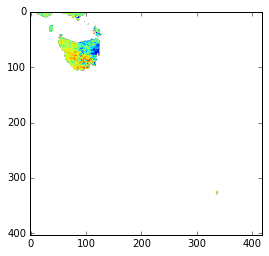

In [7]:
%matplotlib inline
plt.imshow(array_msk)

In [8]:
print vector_path, raster_path, nodata_value, date

D:\Data\WorldShapefile//tasmania_simplified.shp NDAI20090525.tif -3000.0 2009-05-25 00:00:00


In [9]:
stats = gdma.zonal_stats(vector_path, raster_path, nodata_value, date)

finished first 0 features


In [10]:
# lets decompose the zonal_stats function and see why we get this error

In [11]:
from osgeo.gdalconst import *
# open raster layer
rds = gdal.Open(raster_path, GA_ReadOnly)
assert(rds)
rb = rds.GetRasterBand(1)
rgt = rds.GetGeoTransform()

# set raster nodata value
if nodata_value:
    nodata_value = float(nodata_value)
    rb.SetNoDataValue(nodata_value)

# open vector layer
vds = ogr.Open(vector_path, GA_ReadOnly)  
assert(vds)
vlyr = vds.GetLayer(0)    

# compare EPSG values of vector and raster and change projection if necessary
sourceSR = vlyr.GetSpatialRef()
sourceSR.AutoIdentifyEPSG()
EPSG_sourceSR = sourceSR.GetAuthorityCode(None)

targetSR = osr.SpatialReference(wkt=rds.GetProjection())
targetSR.AutoIdentifyEPSG()
EPSG_targetSR = targetSR.GetAuthorityCode(None)

if EPSG_sourceSR != EPSG_sourceSR:
    # reproject vector geometry to same projection as raster
    print 'unequal projections'    
    sourceSR = vlyr.GetSpatialRef()
    targetSR = osr.SpatialReference()
    targetSR.ImportFromWkt(rds.GetProjectionRef())
    coordTrans = osr.CreateCoordinateTransformation(sourceSR,targetSR)    

"""do the work"""
global_src_extent = None
mem_drv = ogr.GetDriverByName('Memory')
driver = gdal.GetDriverByName('MEM')

# Loop through vectors
stats = []
feat = vlyr.GetNextFeature() 

In [12]:
feat.GetField('NAME_1')

'Tasmania'

In [13]:
def bbox_to_pixel_offsets(gt, bbox):
    originX = gt[0]
    originY = gt[3]
    pixel_width = gt[1]
    pixel_height = gt[5]
    x1 = int((bbox[0] - originX) / pixel_width)
    x2 = int((bbox[1] - originX) / pixel_width) + 1

    y1 = int((bbox[3] - originY) / pixel_height)
    y2 = int((bbox[2] - originY) / pixel_height) + 1

    xsize = x2 - x1
    ysize = y2 - y1
    return (x1, y1, xsize, ysize)

In [14]:
# print statement after each hunderds features
fid = int(feat.GetFID())        
if fid % 500 == 0:
    print("finished first %s features" % (fid))

if not global_src_extent:
    #print 'bbox county'
    # use local source extent
    # fastest option when you have fast disks and well indexed raster (ie tiled Geotiff)
    # advantage: each feature uses the smallest raster chunk
    # disadvantage: lots of reads on the source raster
    src_offset = bbox_to_pixel_offsets(rgt, feat.geometry().GetEnvelope())
    src_array = rb.ReadAsArray(*src_offset)

    # calculate new geotransform of the feature subset
    new_gt = (
        (rgt[0] + (src_offset[0] * rgt[1])),
        rgt[1],
        0.0,
        (rgt[3] + (src_offset[1] * rgt[5])),
        0.0,
        rgt[5]
    )

# Create a temporary vector layer in memory
mem_ds = mem_drv.CreateDataSource('out')
mem_layer = mem_ds.CreateLayer('poly', None, ogr.wkbPolygon)
mem_layer.CreateFeature(feat.Clone())

# Rasterize it
rvds = driver.Create('', src_offset[2], src_offset[3], 1, gdal.GDT_Byte)
rvds.SetGeoTransform(new_gt)
gdal.RasterizeLayer(rvds, [1], mem_layer, burn_values=[1])
rv_array = rvds.ReadAsArray()

# Mask the source data array with our current feature
# we take the logical_not to flip 0<->1 to get the correct mask effect
# we also mask out nodata values explictly
try:
    masked = np.ma.MaskedArray(
        src_array,
        mask=np.logical_or(
            src_array == nodata_value,
            np.logical_not(rv_array)
        )
    )
except:
    print 'oi'

    #print 'feature ID: ',int(feat.GetFID())

    # GET STATISTICS FOR EACH COUNTY
#     try:
#         county_stats = getStatsCounty(cnty_array = masked, feat=feat, date=date)            
#         stats.append(county_stats)

#         rvds = None
#         mem_ds = None
#         feat = vlyr.GetNextFeature()
#     except IndexError:
#         print 'feature ID: ',fid, 'IndexError, ignore county and lets continue'                
#         rvds = None
#         mem_ds = None
#         feat = vlyr.GetNextFeature()                


# except np.ma.MaskError: 
#     # catch MaskError, ignore feature containing no valid corresponding raster data set
#     # in my case the the most southern county of hainan is not totally within the raster extent            
#     print 'feature ID: ',fid, ' maskError, ignore county and lets continue'

#     rvds = None
#     mem_ds = None
#     feat = vlyr.GetNextFeature() 

finished first 0 features


2009-05-25 00:00:00


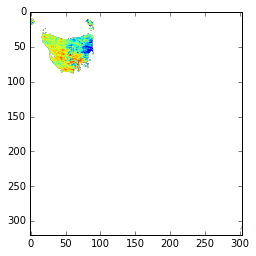

In [15]:
plt.imshow(masked)
print date

In [16]:
cnty_array = masked

In [17]:
cnty_array.shape[0]*cnty_array.shape[1]

96960L

In [19]:
cnty_array.size

96960

In [20]:
cnty_array.count()

2892

In [ ]:
cnty_array[(cnty_array <= 0) ].count()

In [23]:
# def getStatsCounty(cnty_array, feat, date):
#     """
#     Core function to calculate statistics to be applied for each county
    
#     Input:  
#     cnty_array   = Masked raster array of a single county    
#     feat         = feature of shapefile to extract ID
#     Output: 
#     county_stats = Dictionary containing the stats for the county
#     """
date = str(date.year)+str(date.month).zfill(2)+str(date.day).zfill(2)

dc=0
#percentage of no drought
p0=(cnty_array[(cnty_array <= 0) ]).size*1.0/cnty_array.size
if p0>=0.5: dc=1
#percentage of no drought
p1=(cnty_array[(cnty_array<=-0.15)]).size*1.0/cnty_array.size
if p1>0.5: dc=2
#percentage of no drought
p2=(cnty_array[(cnty_array<=-0.25) ]).size*1.0/cnty_array.size
if p2>=0.5: dc=3
#percentage of no drought
p3=(cnty_array[cnty_array <=-0.35]).size*1.0/cnty_array.size
if p3>=0.5: dc=4
#print cnty_array.count(),np.nanmin(cnty_array)
ct=cnty_array.count()
county_stats = {
    'MINIMUM': np.nan if ct<2 else float(np.nanmin(cnty_array)),
    'MN'+date: np.nan if ct<2 else float(np.nanmean(cnty_array)),
    'MAX': np.nan if ct<2 else float(np.nanmax(cnty_array)),
    'STD': np.nan if ct<2 else float(np.nanstd(cnty_array)),
    'SUM': np.nan if ct<2 else float(np.nansum(cnty_array)),
    'COUNT': int(cnty_array.count()),
    'FID': int(feat.GetFID()),  
    'P0'+date:p0,
    'P1'+date:p1,
    'P2'+date:p2,
    'P3'+date:p3,
    'DC'+date:dc}

In [21]:
float(np.nanmean(cnty_array))

-0.012431195005774498

In [22]:
np.ma.mean(cnty_array)

-0.012431194838316773

In [24]:
county_stats

{'COUNT': 2892,
 'DC20090525': 4,
 'FID': 0,
 'MAX': 0.5061419606208801,
 'MINIMUM': -0.5792328715324402,
 'MN20090525': -0.012431195005774498,
 'P020090525': 0.9815387788778878,
 'P120090525': 0.9727722772277227,
 'P220090525': 0.9689665841584159,
 'P320090525': 0.9665635313531353,
 'STD': 0.17689670622348785,
 'SUM': -35.95101547241211}

In [26]:
county_stats

{'DC20090525': 0,
 'FID': 0,
 'MN20090525': -0.012431194838316773,
 'P020090525': 0.45435684647302904,
 'P120090525': 0.21230982019363762,
 'P220090525': 0.11410788381742738,
 'P320090525': 0.046680497925311204}

In [25]:
dc=0
#percentage of no drought
p0=(cnty_array[(cnty_array <= 0) ]).count()*1.0/cnty_array.count()
if p0>=0.5: dc=1
#percentage of no drought
p1=(cnty_array[(cnty_array<=-0.15)]).count()*1.0/cnty_array.count()
if p1>0.5: dc=2
#percentage of no drought
p2=(cnty_array[(cnty_array<=-0.25) ]).count()*1.0/cnty_array.count()
if p2>=0.5: dc=3
#percentage of no drought
p3=(cnty_array[cnty_array <=-0.35]).count()*1.0/cnty_array.count()
if p3>=0.5: dc=4
#print cnty_array.count(),np.nanmin(cnty_array)
ct=cnty_array.count()
county_stats = {
    #'MINIMUM': np.nan if ct<2 else float(np.nanmin(cnty_array)),
    'MN'+date: np.nan if ct<2 else float(np.ma.mean(cnty_array)),
    #'MAX': np.nan if ct<2 else float(np.nanmax(cnty_array)),
    #'STD': np.nan if ct<2 else float(np.nanstd(cnty_array)),
    #'SUM': np.nan if ct<2 else float(np.nansum(cnty_array)),
    #'COUNT': int(cnty_array.count()),
    'FID': int(feat.GetFID()),  
    'P0'+date:p0,
    'P1'+date:p1,
    'P2'+date:p2,
    'P3'+date:p3,
    'DC'+date:dc}

In [ ]:


df_stats = pd.DataFrame(stats)
#df_stats.set_index('FID', inplace=True)
#print df_stats.head(2)

# read shapefile and concatate on index using a 'inner' join
# meaning counties without statistics info will be ignored
gdf = gpd.read_file(vector_path)
gdf.index.rename('FID', inplace=True)
gdf.reset_index(inplace=True)
frames  = [df_stats,gdf]
gdf_df_stats = gdf.merge(df_stats, on='FID')
gdf_df_stats.set_index('FID', inplace=True)

# get column names
ax1_head = gdf_df_stats.columns[10] # P00082014
ax2_head = gdf_df_stats.columns[11] # P10082014
ax3_head = gdf_df_stats.columns[12] # P20082014
ax4_head = gdf_df_stats.columns[13] # P30082014
ax5_head = gdf_df_stats.columns[8]  # MEAN
ax6_head = gdf_df_stats.columns[6]  # DC0082014
print ax1_head, ax2_head, ax3_head, ax4_head, ax5_head, ax6_head
columns_shp = [ax1_head, ax2_head, ax3_head, ax4_head, ax5_head, ax6_head]
# drop NaN values for axis
gdf_df_stats.dropna(inplace=True, subset=columns_shp)
#gdf_df_stats.head(50)
#gdf_df_stats = gpd.pd.concat(frames, axis=1, join='inner')
#gdf_df_stats.index.rename('FID', inplace=True)
#gdf_df_stats.geometry = gdf_df_stats.geometry.astype(gpd.geoseries.GeoSeries) # overcome bug 
#gdf_df_stats.head(2) 

# if necessary save to shapefile
out_filename = r'D:\GitHub\pynotebook\ipymodules\GDMA//world_NDAI'+date_str+'.shp'
gdf_df_stats.to_file(out_filename)  


In [ ]:
date_str = '20120828'
out_filename = r'D:\GitHub\pynotebook\ipymodules\GDMA//world_NDAI20120828.shp'
gdma.rasterize(date_str = date_str, in_shp = out_filename)

In [ ]:
date_str = '20120828'
date=datetime(2012,8,28)
extent = [-179, 179, -60, 90]
gdma.plot_map(date_str = date_str, date=date, extent = extent)